## Import CMIP6 output

In [1]:
import intake

/ncar/usr/jupyterhub/envs/cmip6-201910a/lib/python3.7/site-packages/intake/source/discovery.py:136: FutureWarning: The drivers ['stac-catalog', 'stac-collection', 'stac-item'] do not specify entry_points and were only discovered via a package scan. This may break in a future release of intake. The packages should be updated.
  FutureWarning)


Open the metadata using the catalog .json file

In [2]:
# full path on glade
#catalog = intake.open_esm_datastore("/glade/collections/cmip/catalog/intake-esm-datastore/catalogs/glade-cmip6.json")
# shortcut from github template
#catalog = intake.open_esm_datastore("../catalogs/glade-cmip6.json") # doesn't have CanESM fx output vars
catalog = intake.open_esm_datastore("../catalogs/pangeo-cmip6.json") # this doesn't work w/o internet access
#catalog

Look at top of dataframe

In [3]:
catalog.df.head()

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year
0,AerChemMIP,BCC,BCC-ESM1,ssp370,r1i1p1f1,Amon,pr,gn,gs://cmip6/AerChemMIP/BCC/BCC-ESM1/ssp370/r1i1...,NaN
1,AerChemMIP,BCC,BCC-ESM1,ssp370,r1i1p1f1,Amon,prsn,gn,gs://cmip6/AerChemMIP/BCC/BCC-ESM1/ssp370/r1i1...,NaN
2,AerChemMIP,BCC,BCC-ESM1,ssp370,r1i1p1f1,Amon,tas,gn,gs://cmip6/AerChemMIP/BCC/BCC-ESM1/ssp370/r1i1...,NaN
3,AerChemMIP,BCC,BCC-ESM1,ssp370,r1i1p1f1,Amon,tasmax,gn,gs://cmip6/AerChemMIP/BCC/BCC-ESM1/ssp370/r1i1...,NaN
4,AerChemMIP,BCC,BCC-ESM1,ssp370,r1i1p1f1,Amon,tasmin,gn,gs://cmip6/AerChemMIP/BCC/BCC-ESM1/ssp370/r1i1...,NaN


What are the unique experiment ids?

In [4]:
catalog.unique(['experiment_id'])

{'experiment_id': {'count': 29,
  'values': ['ssp370',
   'esm-ssp585',
   '1pctCO2-bgc',
   'hist-bgc',
   '1pctCO2',
   'abrupt-4xCO2',
   'historical',
   'piControl',
   'amip',
   'esm-hist',
   'esm-piControl',
   'hist-GHG',
   'hist-aer',
   'hist-nat',
   'dcppA-assim',
   'dcppA-hindcast',
   'dcppC-hindcast-noAgung',
   'dcppC-hindcast-noElChichon',
   'dcppC-hindcast-noPinatubo',
   'highresSST-present',
   'control-1950',
   'hist-1950',
   'deforest-globe',
   'esm-ssp585-ssp126Lu',
   'omip1',
   'lgm',
   'ssp126',
   'ssp245',
   'ssp585']}}

What are the unique table ids?

In [5]:
catalog.unique(['table_id'])

{'table_id': {'count': 23,
  'values': ['Amon',
   'Lmon',
   'Oyr',
   'Omon',
   'SImon',
   'day',
   '3hr',
   '6hrLev',
   'LImon',
   'Aclim',
   'Ofx',
   'fx',
   'Emon',
   '6hrPlev',
   'Oclim',
   'SIclim',
   'Eclim',
   'Odec',
   'AERmon',
   'ImonGre',
   '6hrPlevPt',
   'CF3hr',
   'E3hr']}}

Interested in experiment id "esm-ssp585"

In [6]:
sr_esm_nbp = catalog.search(experiment_id='esm-ssp585', variable_id='nbp')
sr_esm_nbp

pangeo-cmip6-ESM Collection with 4 entries:
	> 1 activity_id(s)

	> 2 institution_id(s)

	> 2 source_id(s)

	> 1 experiment_id(s)

	> 3 member_id(s)

	> 1 table_id(s)

	> 1 variable_id(s)

	> 1 grid_label(s)

	> 4 zstore(s)

	> 0 dcpp_init_year(s)

In [7]:
#sr_esm_nbp.df.iloc[0].path # for glade catalog only
sr_esm_nbp.df.iloc[0].zstore

'gs://cmip6/C4MIP/CCCma/CanESM5/esm-ssp585/r1i1p1f1/Lmon/nbp/gn/'

What models have this output?

In [9]:
sr_esm_nbp.unique('source_id')

{'source_id': {'count': 2, 'values': ['CanESM5', 'CESM2']}}

In [8]:
sr_esm_nbp.unique('member_id') # note - not all models have same number of ensemble members

{'member_id': {'count': 3, 'values': ['r1i1p1f1', 'r2i1p1f1', 'r3i1p1f1']}}

In [10]:
sr_esm_nbp.unique('grid_label')

{'grid_label': {'count': 1, 'values': ['gn']}}

Search for fixed variable output (e.g., gridcell area, landfrac) for the same model and first ensemble member

In [11]:
sr_fx = catalog.search(table_id = ['fx'], source_id = ['CanESM5','CESM2'], member_id = 'r1i1p1f1')
sr_fx

pangeo-cmip6-ESM Collection with 14 entries:
	> 2 activity_id(s)

	> 2 institution_id(s)

	> 2 source_id(s)

	> 4 experiment_id(s)

	> 1 member_id(s)

	> 1 table_id(s)

	> 4 variable_id(s)

	> 1 grid_label(s)

	> 14 zstore(s)

	> 0 dcpp_init_year(s)

In [12]:
sr_fx.unique('experiment_id')

{'experiment_id': {'count': 4,
  'values': ['historical', 'piControl', 'ssp245', 'ssp585']}}

Do another search to pick out only one experiment id (use historical for now since it has both area and landfrac)

In [13]:
sr_fx_ctrl = catalog.search(table_id = ['fx'], source_id = ['CanESM5','CESM2'], member_id = 'r1i1p1f1', experiment_id = 'historical')
sr_fx_ctrl

pangeo-cmip6-ESM Collection with 8 entries:
	> 1 activity_id(s)

	> 2 institution_id(s)

	> 2 source_id(s)

	> 1 experiment_id(s)

	> 1 member_id(s)

	> 1 table_id(s)

	> 4 variable_id(s)

	> 1 grid_label(s)

	> 8 zstore(s)

	> 0 dcpp_init_year(s)

In [14]:
sr_fx_ctrl.unique('variable_id')

{'variable_id': {'count': 4,
  'values': ['areacella', 'orog', 'sftgif', 'sftlf']}}

Do another search to subset further - area (areacella) and landfrac (sftlf) only

In [15]:
sr_fx_ctrl_vars = catalog.search(table_id = ['fx'], source_id = ['CanESM5','CESM2'], member_id = 'r1i1p1f1', experiment_id = 'historical', variable_id = ['areacella', 'sftlf'])
sr_fx_ctrl_vars

pangeo-cmip6-ESM Collection with 4 entries:
	> 1 activity_id(s)

	> 2 institution_id(s)

	> 2 source_id(s)

	> 1 experiment_id(s)

	> 1 member_id(s)

	> 1 table_id(s)

	> 2 variable_id(s)

	> 1 grid_label(s)

	> 4 zstore(s)

	> 0 dcpp_init_year(s)

Check that fx output grid label matches variable output (hopefully good enough to use based on that?)

In [16]:
sr_fx_ctrl_vars.unique('grid_label')

{'grid_label': {'count': 1, 'values': ['gn']}}

## Convert fx dataframe to dictionary, keys will be models, datasets will concatenate along ensemble member

In [17]:
fx_ds = sr_fx_ctrl_vars.to_dataset_dict()
fx_ds

--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'

--> There will be 2 group(s)


{'CMIP.CCCma.CanESM5.historical.fx.gn': <xarray.Dataset>
 Dimensions:    (bnds: 2, lat: 64, lon: 128, member_id: 1)
 Coordinates:
   * lat        (lat) float64 -87.86 -85.1 -82.31 -79.53 ... 82.31 85.1 87.86
   * lon        (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
   * member_id  (member_id) <U8 'r1i1p1f1'
 Dimensions without coordinates: bnds
 Data variables:
     lat_bnds   (lat, bnds) float64 dask.array<chunksize=(64, 2), meta=np.ndarray>
     lon_bnds   (lon, bnds) float64 dask.array<chunksize=(128, 2), meta=np.ndarray>
     areacella  (member_id, lat, lon) float32 dask.array<chunksize=(1, 64, 128), meta=np.ndarray>
     type       |S4 ...
     sftlf      (member_id, lat, lon) float32 dask.array<chunksize=(1, 64, 128), meta=np.ndarray>
 Attributes:
     source_type:                 AOGCM
     initialization_index:        1
     activity_id:                 CMIP
     tracking_id:                 hdl:21.14100/dd606980-b677-4d42-92fc-b7d0734...
     branch_time_

In [18]:
fx_ds.keys()

dict_keys(['CMIP.CCCma.CanESM5.historical.fx.gn', 'CMIP.NCAR.CESM2.historical.fx.gn'])

In [31]:
fx_ds_cesm = fx_ds['CMIP.NCAR.CESM2.historical.fx.gn']
landfrac_cesm = fx_ds_cesm.sftlf
area_cesm = fx_ds_cesm.areacella
#area_cesm.units # area in m^2
#landfrac_cesm.units # landfrac in % so divide by 100 to get frac
#landfrac_cesm.values

array([[[100., 100., 100., ..., 100., 100., 100.],
        [100., 100., 100., ..., 100., 100., 100.],
        [100., 100., 100., ..., 100., 100., 100.],
        ...,
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.]]], dtype=float32)

In [32]:
landfrac_cesm_frac = landfrac_cesm / 100
#landfrac_cesm_frac.values

In [35]:
fx_ds_canesm = fx_ds['CMIP.CCCma.CanESM5.historical.fx.gn']
landfrac_canesm = fx_ds_canesm.sftlf
area_canesm = fx_ds_canesm.areacella
#area_canesm.units # area in m^2
#landfrac_canesm.units # landfrac in % so divide by 100 to get frac
#landfrac_canesm.values

array([[[100., 100., 100., ..., 100., 100., 100.],
        [100., 100., 100., ..., 100., 100., 100.],
        [100., 100., 100., ..., 100., 100., 100.],
        ...,
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.]]], dtype=float32)

In [39]:
landfrac_canesm_frac = landfrac_canesm / 100
#landfrac_canesm_frac.values

array([[[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]], dtype=float32)

## Convert variable search dataframe to dictionary

In [45]:
esm_nbp_ds = sr_esm_nbp.to_dataset_dict()

--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'

--> There will be 2 group(s)


In [46]:
esm_nbp_ds

{'C4MIP.CCCma.CanESM5.esm-ssp585.Lmon.gn': <xarray.Dataset>
 Dimensions:    (bnds: 2, lat: 64, lon: 128, member_id: 3, time: 1032)
 Coordinates:
   * time       (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:00:00
   * lat        (lat) float64 -87.86 -85.1 -82.31 -79.53 ... 82.31 85.1 87.86
   * lon        (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
   * member_id  (member_id) <U8 'r1i1p1f1' 'r2i1p1f1' 'r3i1p1f1'
 Dimensions without coordinates: bnds
 Data variables:
     lat_bnds   (lat, bnds) float64 dask.array<chunksize=(64, 2), meta=np.ndarray>
     time_bnds  (time, bnds) object dask.array<chunksize=(1032, 2), meta=np.ndarray>
     lon_bnds   (lon, bnds) float64 dask.array<chunksize=(128, 2), meta=np.ndarray>
     nbp        (member_id, time, lat, lon) float32 dask.array<chunksize=(1, 1032, 64, 128), meta=np.ndarray>
 Attributes:
     source_type:                 AOGCM
     initialization_index:        1
     activity_id:                 C4MIP
     trackin

What are the dictionary keys?

In [47]:
esm_nbp_ds.keys()

dict_keys(['C4MIP.CCCma.CanESM5.esm-ssp585.Lmon.gn', 'C4MIP.NCAR.CESM2.esm-ssp585.Lmon.gn'])

Access dataset from dictionary using appropriate key

In [65]:
nbp_ds_canesm = esm_nbp_ds['C4MIP.CCCma.CanESM5.esm-ssp585.Lmon.gn']
nbp_canesm = nbp_ds_canesm.nbp
nbp_cesm = esm_nbp_ds['C4MIP.NCAR.CESM2.esm-ssp585.Lmon.gn'].nbp
#nbp_cesm.units
#nbp_cesm.values

array([[[[ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        ...,

        [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.

## Plotting NBP so far

In [49]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

In [50]:
def weighted_annual_mean(array):
    mon_day  = xr.DataArray(np.array([31,28,31,30,31,30,31,31,30,31,30,31]), dims=['month'])
    mon_wgt  = mon_day/mon_day.sum()
    return (array.rolling(time=12, center=False) # rolling
            .construct("month") # construct the array
            .isel(time=slice(11, None, 12)) # slice so that the first element is [1..12], second is [13..24]
            .dot(mon_wgt, dims=["month"]))

In [58]:
spy = 365 * 24 * 3600  # Convert  to annual fluxes (kgC/m2/y), from kgC/m2/s 
nbp_canesm_amean = weighted_annual_mean(nbp_canesm) * spy
nbp_canesm_amean.attrs['units'] = 'kgC m-2 y-1'
nbp_canesm_amean # 3 ensemble members for CanESM

<xarray.DataArray (member_id: 3, time: 86, lat: 64, lon: 128)>
dask.array<mul, shape=(3, 86, 64, 128), dtype=float64, chunksize=(1, 86, 64, 128), chunktype=numpy.ndarray>
Coordinates:
  * time       (time) object 2015-12-16 12:00:00 ... 2100-12-16 12:00:00
  * lat        (lat) float64 -87.86 -85.1 -82.31 -79.53 ... 82.31 85.1 87.86
  * lon        (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
  * member_id  (member_id) <U8 'r1i1p1f1' 'r2i1p1f1' 'r3i1p1f1'
Attributes:
    units:    kgC m-2 y-1

In [83]:
nbp_cesm_amean = weighted_annual_mean(nbp_cesm) * spy
nbp_cesm_amean.attrs['units'] = 'kgC m-2 y-1'
nbp_cesm_amean.lat # single ensemble member for CESM

<xarray.DataArray 'lat' (lat: 192)>
array([-90.      , -89.057594, -88.115181, -87.172775, -86.23037 , -85.287956,
       -84.345551, -83.403145, -82.460732, -81.518326, -80.575912, -79.633507,
       -78.691101, -77.748688, -76.806282, -75.863876, -74.921463, -73.979057,
       -73.036652, -72.094238, -71.151833, -70.209427, -69.267014, -68.324608,
       -67.382202, -66.439789, -65.497383, -64.554977, -63.612564, -62.670158,
       -61.727749, -60.785339, -59.842934, -58.900524, -57.958115, -57.015705,
       -56.073299, -55.13089 , -54.18848 , -53.246075, -52.303665, -51.361256,
       -50.41885 , -49.47644 , -48.534031, -47.591621, -46.649216, -45.706806,
       -44.764397, -43.821991, -42.879581, -41.937172, -40.994766, -40.052357,
       -39.109947, -38.167538, -37.225132, -36.282722, -35.340313, -34.397907,
       -33.455498, -32.513088, -31.570681, -30.628273, -29.685863, -28.743456,
       -27.801046, -26.858639, -25.916231, -24.973822, -24.031414, -23.089005,
       -22.14659

### Making weights for global sums

In [82]:
landUp_cesm = area_cesm * landfrac_cesm_frac
print(landUp_cesm.lat)
area_wgt_cesm = landUp_cesm / landUp_cesm.sum()    # weighting for each grid cell
#area_wgt_cesm

<xarray.DataArray 'lat' (lat: 192)>
array([-90.      , -89.057592, -88.115183, -87.172775, -86.230366, -85.287958,
       -84.34555 , -83.403141, -82.460733, -81.518325, -80.575916, -79.633508,
       -78.691099, -77.748691, -76.806283, -75.863874, -74.921466, -73.979058,
       -73.036649, -72.094241, -71.151832, -70.209424, -69.267016, -68.324607,
       -67.382199, -66.439791, -65.497382, -64.554974, -63.612565, -62.670157,
       -61.727749, -60.78534 , -59.842932, -58.900524, -57.958115, -57.015707,
       -56.073298, -55.13089 , -54.188482, -53.246073, -52.303665, -51.361257,
       -50.418848, -49.47644 , -48.534031, -47.591623, -46.649215, -45.706806,
       -44.764398, -43.82199 , -42.879581, -41.937173, -40.994764, -40.052356,
       -39.109948, -38.167539, -37.225131, -36.282723, -35.340314, -34.397906,
       -33.455497, -32.513089, -31.570681, -30.628272, -29.685864, -28.743455,
       -27.801047, -26.858639, -25.91623 , -24.973822, -24.031414, -23.089005,
       -22.14659

In [54]:
landUp_canesm = area_canesm * landfrac_canesm_frac
area_wgt_canesm = landUp_canesm / landUp_canesm.sum()
area_wgt_canesm

<xarray.DataArray (member_id: 1, lat: 64, lon: 128)>
dask.array<truediv, shape=(1, 64, 128), dtype=float32, chunksize=(1, 64, 128), chunktype=numpy.ndarray>
Coordinates:
  * lat        (lat) float64 -87.86 -85.1 -82.31 -79.53 ... 82.31 85.1 87.86
  * lon        (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
  * member_id  (member_id) <U8 'r1i1p1f1'

### Global sum

In [81]:
#mean_wgt_cesm = nbp_cesm_amean * landUp_cesm
mean_wgt_cesm = nbp_cesm_amean.dot(landUp_cesm)
print(mean_wgt_cesm)
#ann_glob_cesm = mean_wgt_cesm.sum(dim=('lat','lon')) * 1e-15 #convert to Pg/y
#ann_glob_cesm.attrs['units'] = 'Pg C y^-1'
#print(ann_glob_cesm.values)

ValueError: indexes along dimension 'lat' are not equal

In [59]:
mean_wgt_canesm = nbp_canesm_amean * landUp_canesm # this gets rid of the second two ensemble members - how to preserve?
ann_glob_canesm = mean_wgt_canesm.sum(dim=('lat','lon')) * 1e-15 #convert to Pg/y
ann_glob_canesm.attrs['units'] = 'Pg C y^-1'
print(ann_glob_canesm)

<xarray.DataArray (member_id: 1, time: 86)>
dask.array<mul, shape=(1, 86), dtype=float64, chunksize=(1, 86), chunktype=numpy.ndarray>
Coordinates:
  * member_id  (member_id) object 'r1i1p1f1'
  * time       (time) object 2015-12-16 12:00:00 ... 2100-12-16 12:00:00
Attributes:
    units:    Pg C y^-1


### Make a line plot

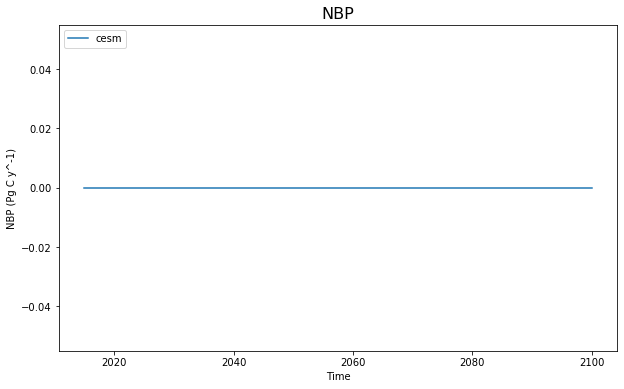

In [61]:
fig = plt.figure(figsize=(10, 6))

# Ask, out of a 1x1 grid, the first axes.
ax = fig.add_subplot(1, 1, 1)

# Plot times as x-variable and temperatures as y-variable
ax.plot(ann_glob_cesm.coords['time.year'], ann_glob_cesm[0,:], label='cesm')
# Add some labels to the plot
ax.set_xlabel('Time')
ax.set_ylabel('NBP'+' (' + ann_glob_cesm.attrs['units'] +')')
ax.set_title('NBP', fontdict={'size':16})
ax.legend(loc='upper left');

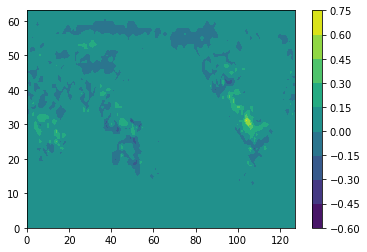

In [117]:
plt.contourf(amean[0,0,:,:])
plt.colorbar()

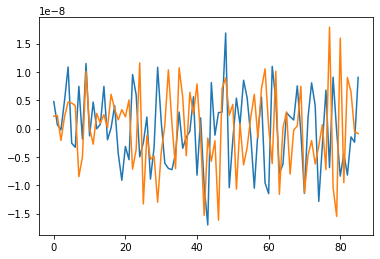

In [115]:
plt.plot(amean[0,:,0,0])
plt.plot(amean[1,:,0,0])

In [101]:
spy = 365 * 24 * 3600  # Convert  to annual fluxes (kgC/m2/y), from kgC/m2/s 
mean_dataset = da.apply(weighted_annual_mean) * spy
mean_dataset.attrs['units'] = 'kgC m-2 y-1'

AttributeError: 'DataArray' object has no attribute 'apply'